### Загруженные таблицы
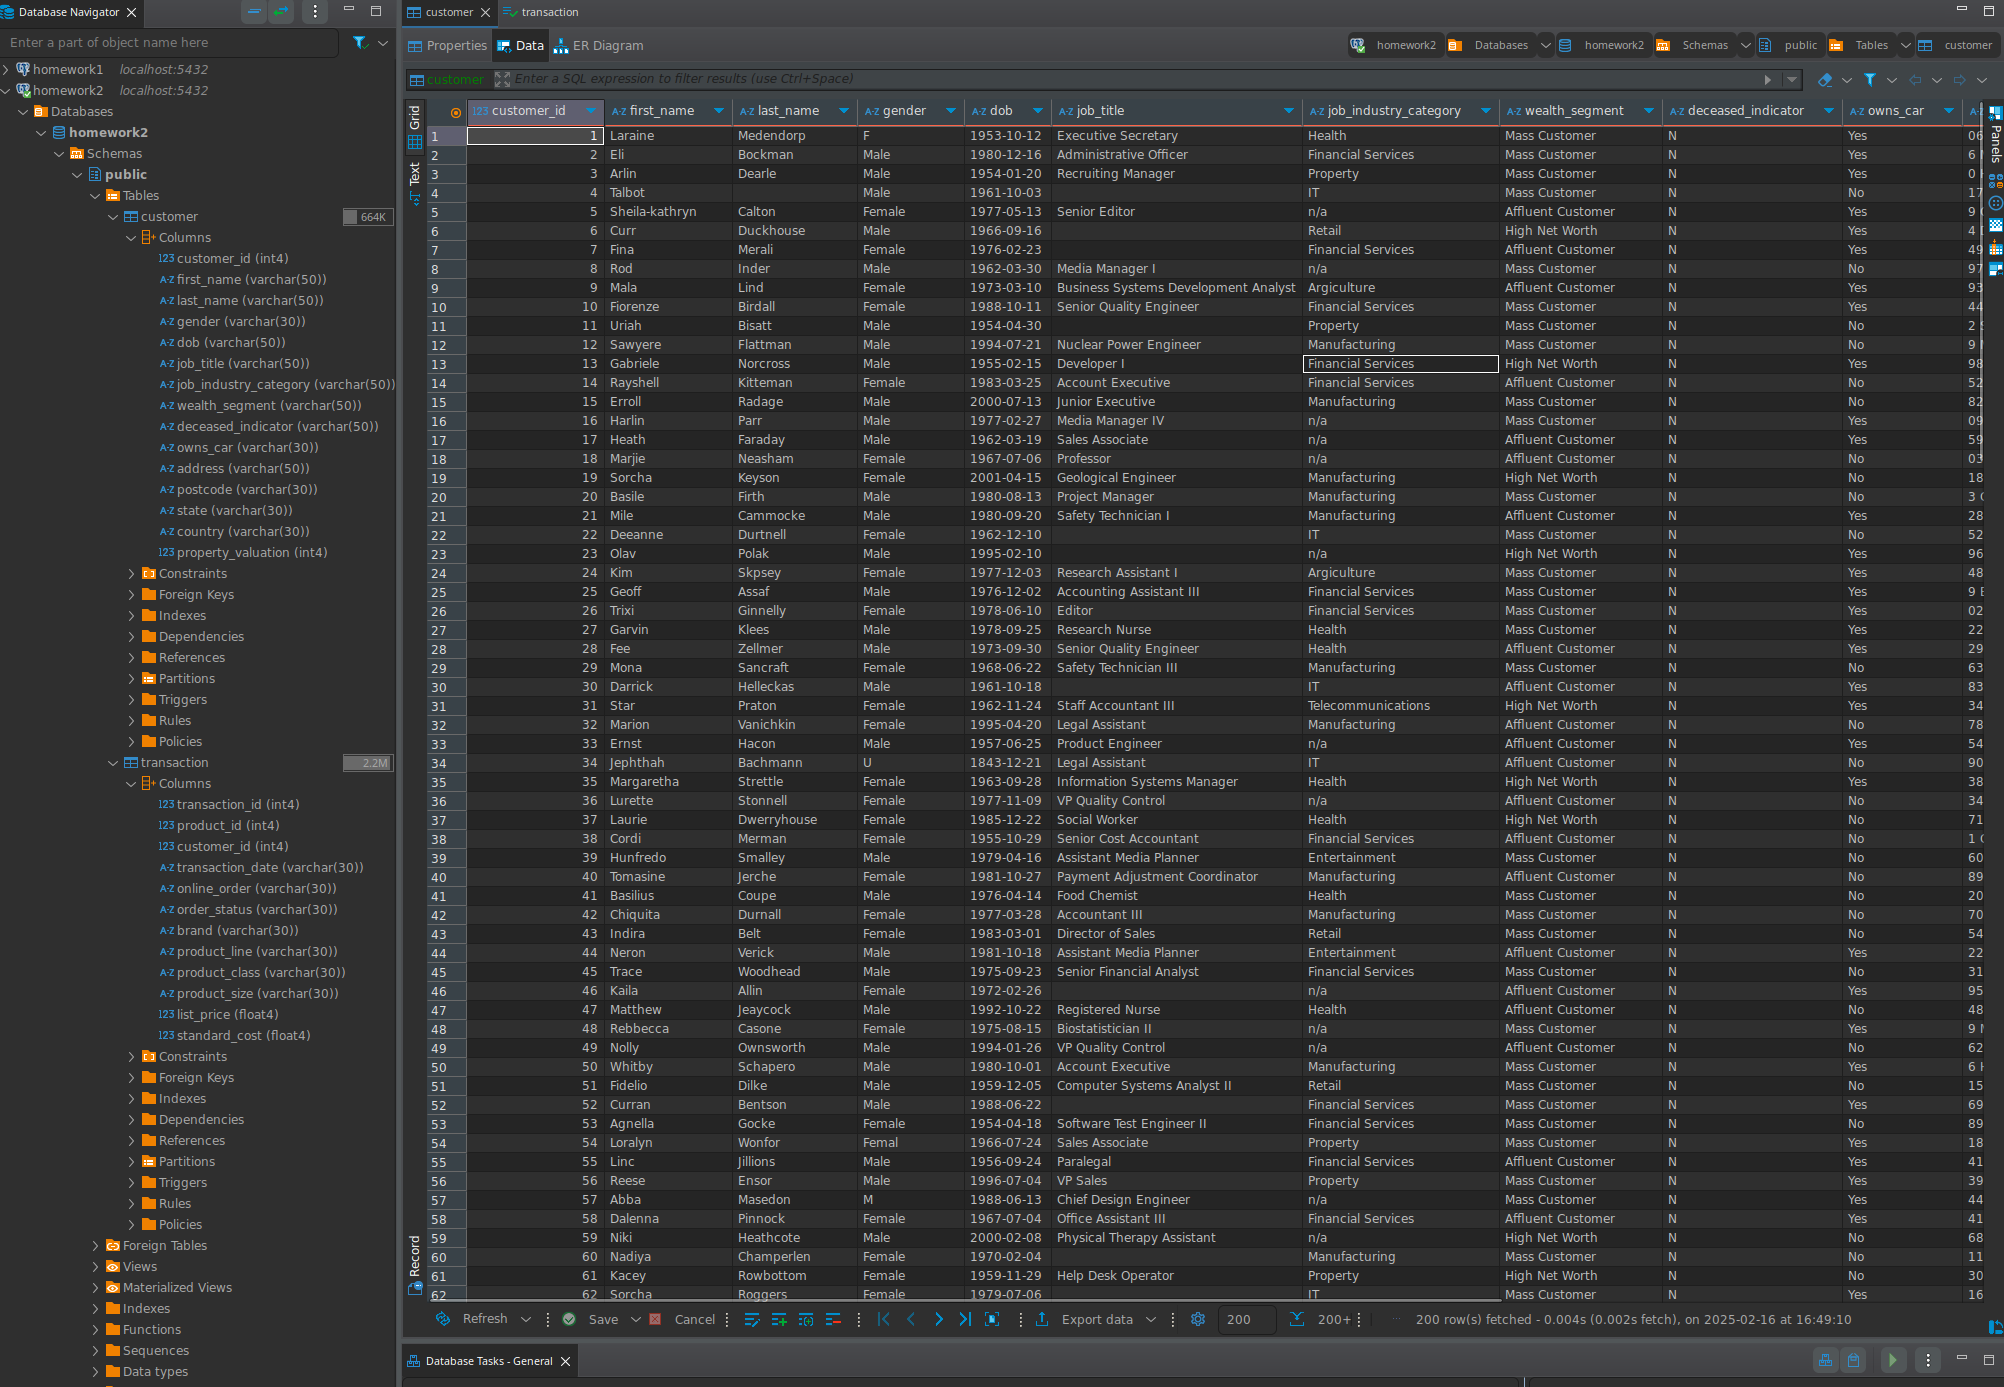
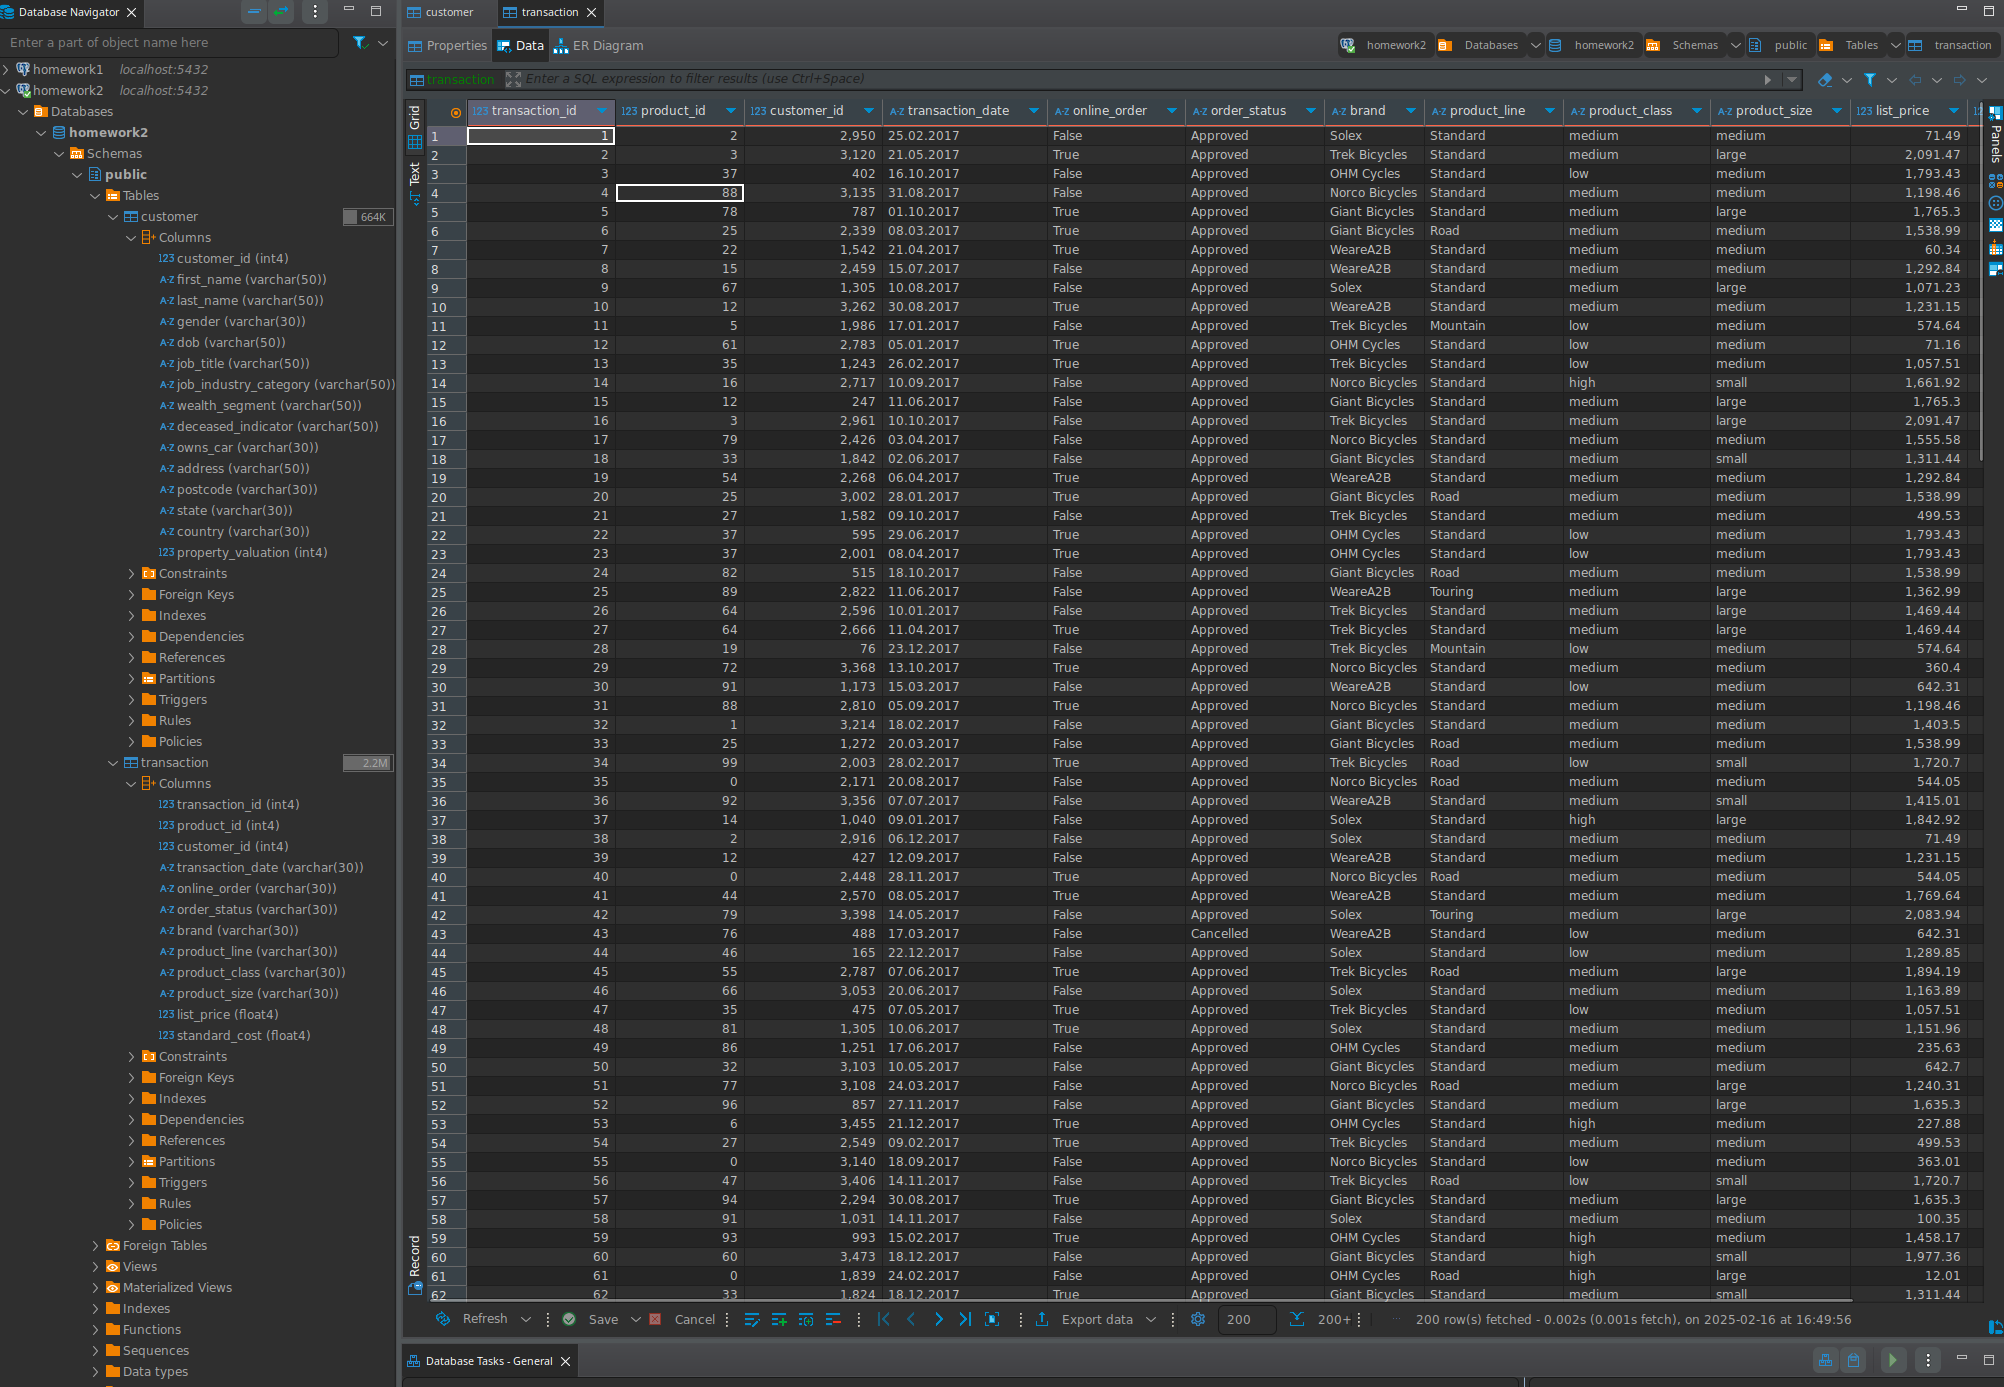

### Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов.
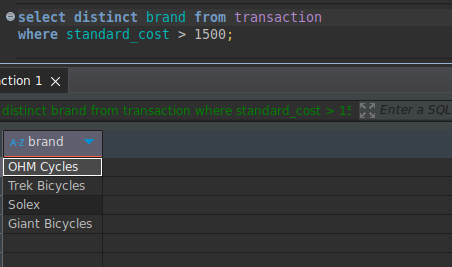

```sql
select distinct brand from transaction 
where standard_cost > 1500;
```

### Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно.
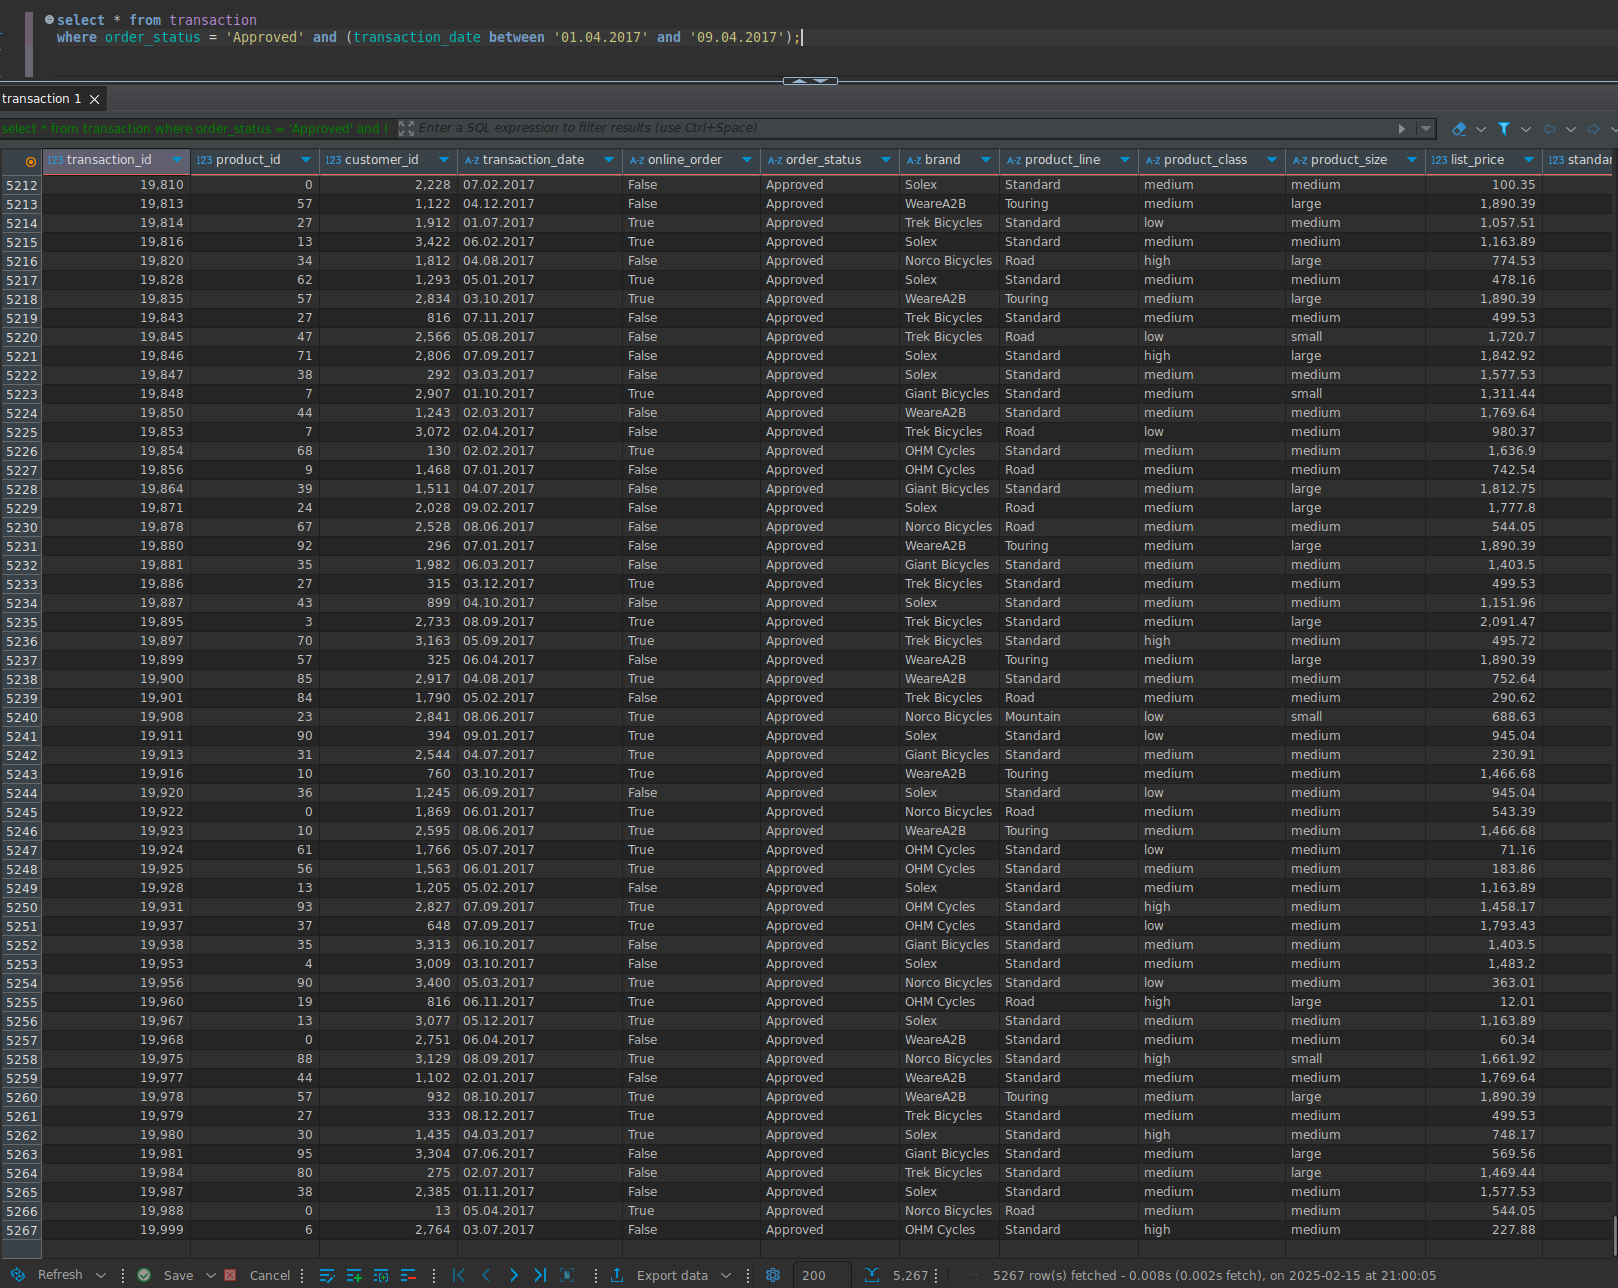

```sql
select * from transaction 
where order_status = 'Approved' and (transaction_date between '01.04.2017' and '09.04.2017');
```


### Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'. 
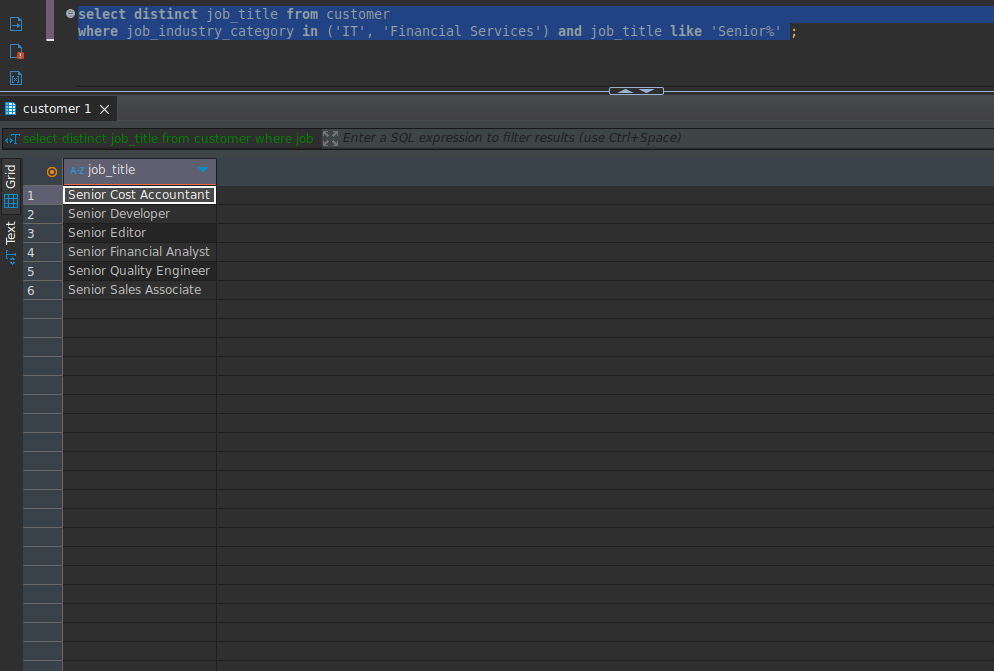

```sql
select distinct job_title from customer
where job_industry_category in ('IT', 'Financial Services') and job_title like 'Senior%';
```

### Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services
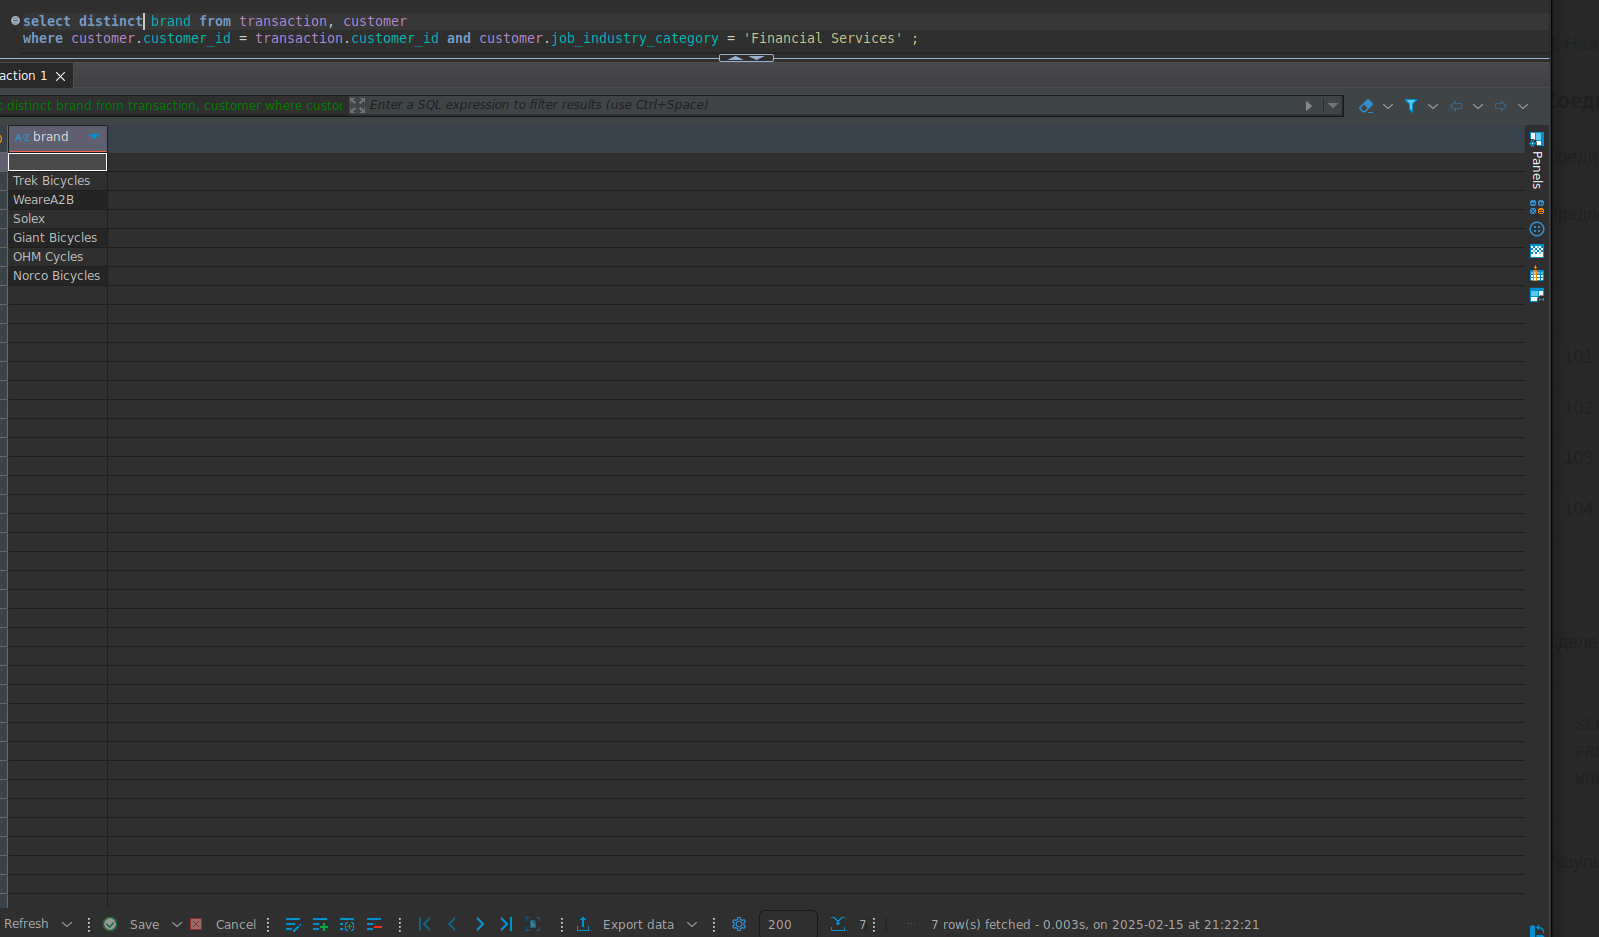

```sql
select distinct brand from transaction, customer
where customer.customer_id = transaction.customer_id and customer.job_industry_category = 'Financial Services' ;
```


### Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'.
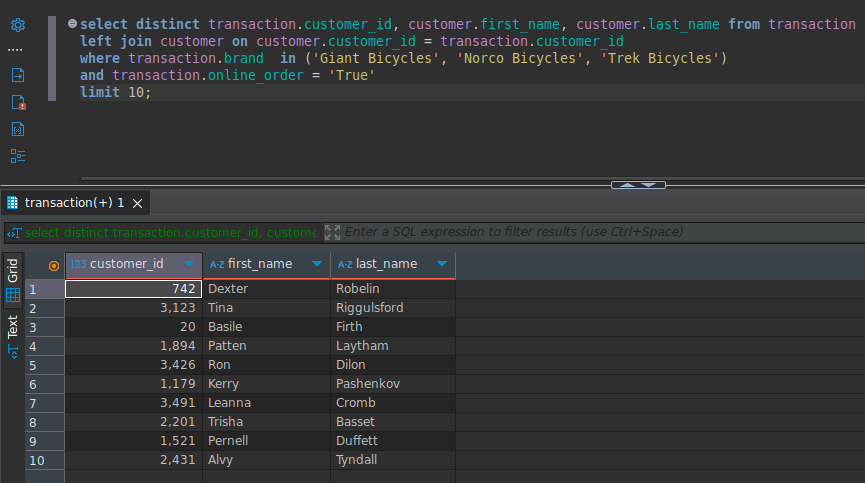

```sql
select distinct transaction.customer_id, customer.first_name, customer.last_name from transaction
left join customer on customer.customer_id = transaction.customer_id 
where transaction.brand  in ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles')
and transaction.online_order = 'True'
limit 10;
```

### Вывести всех клиентов, у которых нет транзакций.
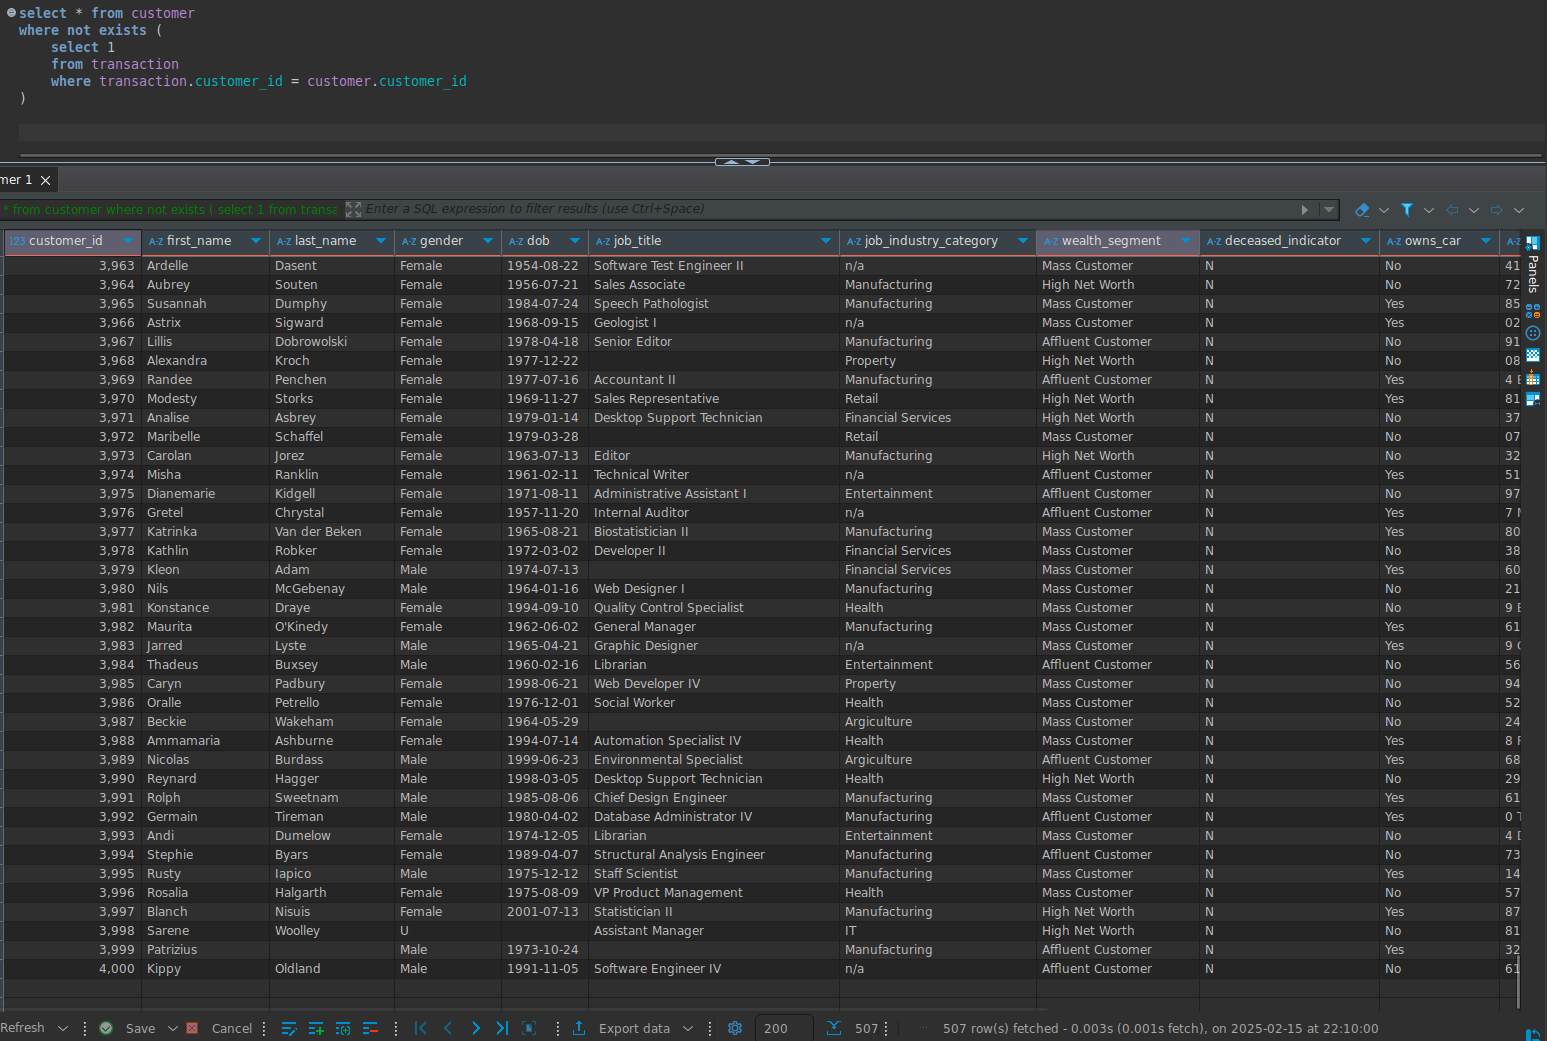

```sql
select * from customer
where not exists (
	select 1
	from transaction
	where transaction.customer_id = customer.customer_id
)
```


### Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью.
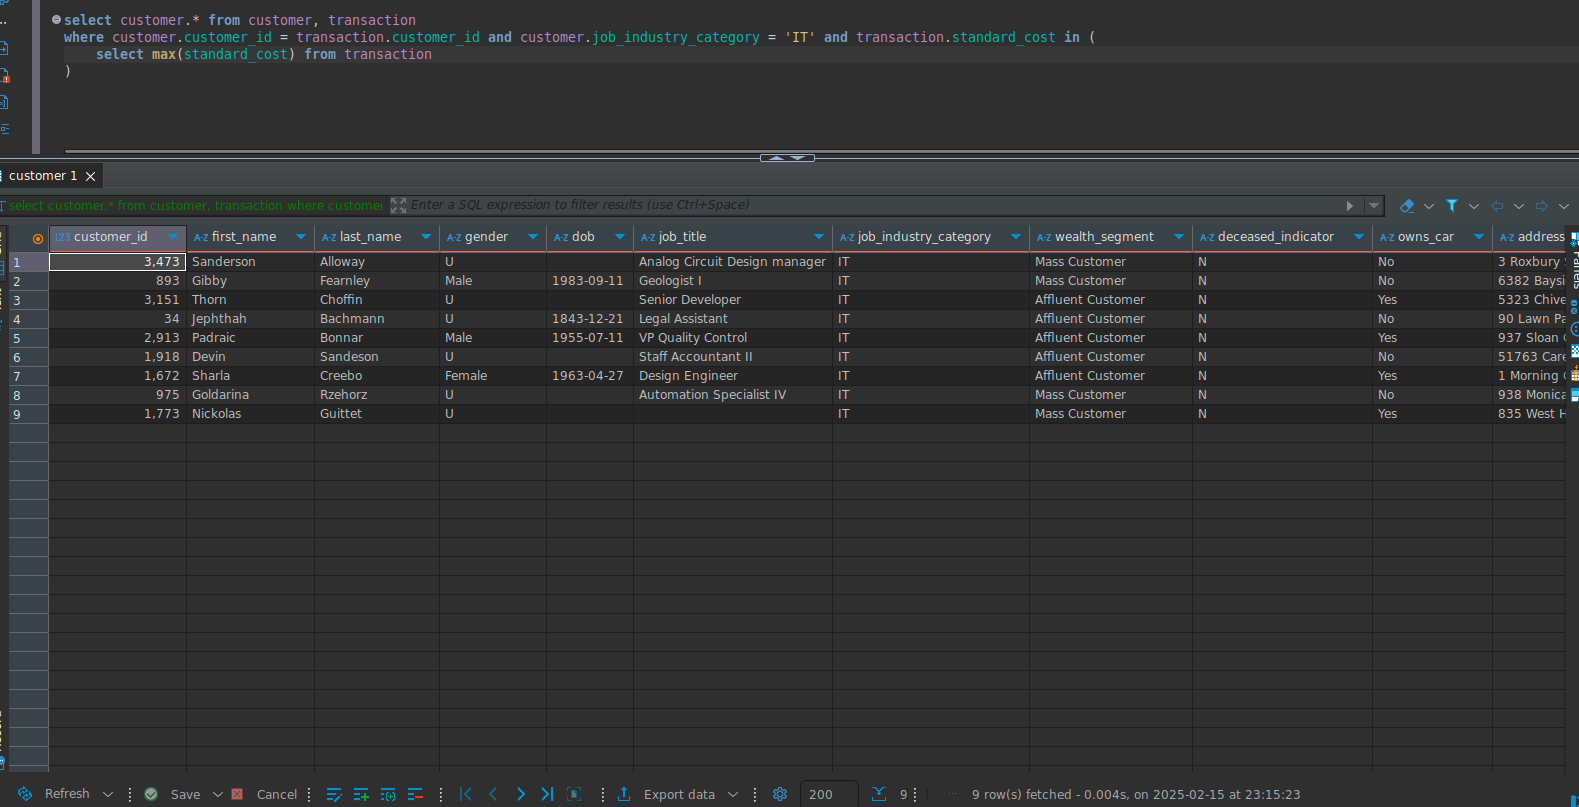

```sql
select customer.* from customer, transaction
where customer.customer_id = transaction.customer_id and customer.job_industry_category = 'IT' and transaction.standard_cost in (
	select max(standard_cost) from transaction
)
```

### Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'.

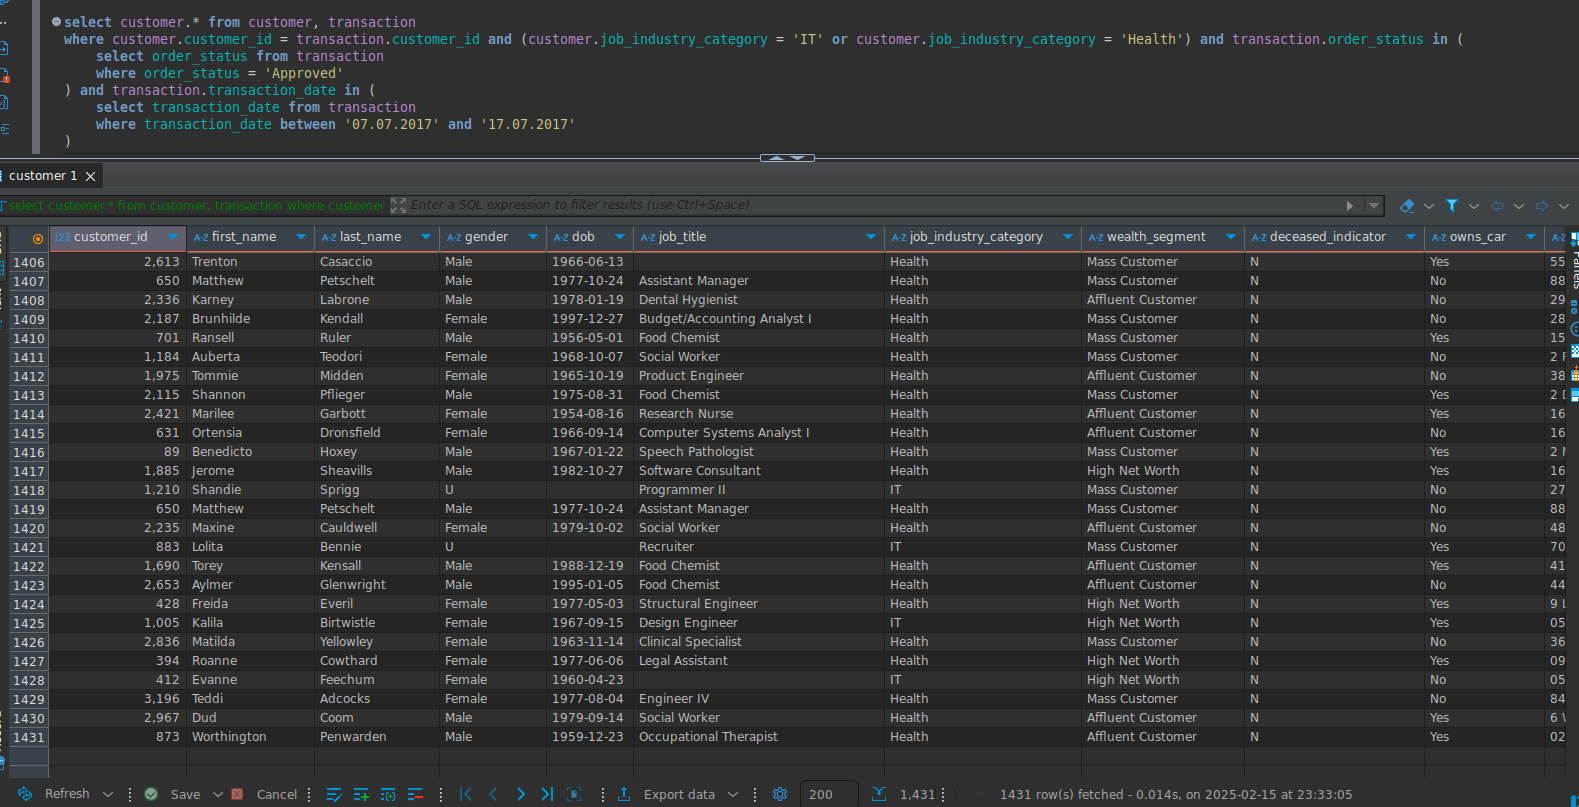

```sql
select customer.* from customer, transaction
where customer.customer_id = transaction.customer_id and (customer.job_industry_category = 'IT' or customer.job_industry_category = 'Health') and transaction.order_status in (
	select order_status from transaction
	where order_status = 'Approved'
) and transaction.transaction_date in (
	select transaction_date from transaction
	where transaction_date between '07.07.2017' and '17.07.2017'
)
```